In [2]:
%matplotlib inline
from lexer import LangLexer
from parser import LangParser
from comb_parser import WhileCheckCorr
import datetime
import matplotlib.pyplot as plt

In [2]:
test_string = 'let i=1; let a=0; while i<=2 { a+=1; a+=1; }'

In [3]:
lex = LangLexer()
parser_gen = LangParser()
parser_comb = WhileCheckCorr()

In [4]:
tree = parser_gen.parse(lex.tokenize(test_string))

In [5]:
parser_comb.parse_obj(test_string)

True

In [6]:
element = 'a+=1; '

In [7]:
def get_str(el_number):
    return 'let i=1; let a=0; while i<=2 { ' + element * el_number + '}'

In [8]:
tree = parser_gen.parse(lex.tokenize(get_str(5)))

In [13]:
# creating the set of numbers of increment operators in loop
# double number every time to check complexity of each of algorithms time complexity

set_of_numbers = [2**i for i in range(20)]
gen_times = []
comb_times = []
set_of_numbers

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072,
 262144,
 524288]

In [14]:
# time testing

%%time
for i in set_of_numbers:
    t1 = datetime.datetime.now()
    tree = parser_gen.parse(lex.tokenize(get_str(i)))
    t2 = datetime.datetime.now()
    res = parser_comb.parse_obj(get_str(i))
    t3 = datetime.datetime.now()
    
    gen_times.append((t2 - t1).microseconds + (t2 - t1).seconds * 1000000)
    comb_times.append((t3 - t2).microseconds + (t3 - t2).seconds * 1000000)

CPU times: user 1h 19min 49s, sys: 1min 43s, total: 1h 21min 33s
Wall time: 1h 21min 33s


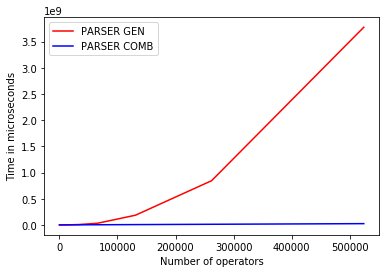

In [15]:
# plotting the results

plt.plot(set_of_numbers, gen_times, 'r', label = 'PARSER GEN')
plt.plot(set_of_numbers, comb_times, 'b', label = 'PARSER COMB')
plt.xlabel('Number of operators')
plt.ylabel('Time in microseconds')
plt.legend()
plt.show()

In [16]:
# get the ratio of each next iteration to previous and calculating mean of this results for each algo

from statistics import mean
gen_quotient = [gen_times[i]/gen_times[i-1] for i in range(1, len(gen_times))]
comb_quotient = [comb_times[i]/comb_times[i-1] for i in range(1, len(comb_times))]
mean(gen_quotient), mean(comb_quotient)

(2.720217874973988, 1.7882800912449923)

In [17]:
# from 16 generator test, ratio is constantly near 4.5, which is approximately 2 * 2 = 4 ~ 4.5
# so we approximately take gen parser complexity as O(n^2)

gen_quotient, comb_quotient

([0.029715882626921285,
  1.134796238244514,
  1.276243093922652,
  4.915584415584416,
  0.6516952884191985,
  1.8418918918918918,
  1.7828319882611885,
  2.0419753086419754,
  1.7646110439338976,
  2.06766788487894,
  2.2111077356458337,
  3.216294871474607,
  2.217706201481148,
  2.9065432016614543,
  4.2280453155387185,
  4.493008520585001,
  5.883647544725676,
  4.550696977835678,
  4.47007621915206],
 [1.0013850415512466,
  1.0069156293222683,
  1.2692307692307692,
  2.5844155844155843,
  1.1306532663316582,
  1.4248148148148148,
  1.957629321549259,
  1.66485194529279,
  1.9322858510129208,
  1.9756470054071904,
  2.0641400635132876,
  2.323164436527055,
  1.81252505184643,
  1.928423770125331,
  1.905898219901553,
  1.9909968712067305,
  1.9990562635130384,
  2.0029870067343216,
  2.002300821358605])